### Joslin

* [Dataset]

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/joslin/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'ID'], inplace=True)
# df.DR_3 = df.DR_3.astype(str) ## Do not convert it here. This will be done in line 186/203 in classifiers.py
df.head()

,EYE_DR,DR_2,DR_3,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,0,0,0,train,0.044448,-0.016027,0.017608,-0.016185,-0.041602,-0.035034,...,-0.033079,0.032731,0.020202,0.024334,-0.008104,0.015669,0.001840,0.001327,0.033215,0.039098
1,0,0,0,test,0.029650,-0.000593,-0.004401,-0.004392,-0.020173,-0.032837,...,-0.024152,0.035279,0.021405,0.023677,-0.015291,0.010390,0.002509,-0.006607,0.026453,0.041491
2,0,0,0,train,0.013711,0.014739,-0.003008,0.023557,-0.045931,-0.026063,...,-0.030840,0.034043,0.019428,0.028000,-0.008120,0.014009,-0.000018,0.003730,0.035412,0.041428
3,0,0,0,train,0.011001,0.019058,-0.019210,-0.003728,-0.026355,-0.021273,...,-0.025060,0.039466,0.016795,0.023039,-0.017141,0.008031,-0.000838,0.005989,0.030590,0.040838
4,0,0,0,train,0.015818,-0.031896,0.000313,-0.010478,-0.041577,-0.025767,...,-0.018197,0.031772,0.003020,0.026444,0.006365,0.015178,0.000433,0.006788,0.016322,0.042621


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'DR_3'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (1434, 1028)
Test Shape: (359, 1028)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 131843


STAGE:2024-02-25 14:37:07 300329:300329 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.5738, macro-f1: 0.2675
Epoch 1/50 - Training Time: 0.28 seconds | Inference Time: 0.12 seconds
Epoch 2/50 - Test Accuracy: 0.5181, macro-f1: 0.4707
Epoch 2/50 - Training Time: 0.26 seconds | Inference Time: 0.15 seconds
Epoch 3/50 - Test Accuracy: 0.4262, macro-f1: 0.4159
Epoch 3/50 - Training Time: 0.27 seconds | Inference Time: 0.13 seconds
Epoch 4/50 - Test Accuracy: 0.5432, macro-f1: 0.4648
Epoch 4/50 - Training Time: 0.28 seconds | Inference Time: 0.14 seconds
Epoch 5/50 - Test Accuracy: 0.5181, macro-f1: 0.4562
Epoch 5/50 - Training Time: 0.27 seconds | Inference Time: 0.13 seconds
Epoch 6/50 - Test Accuracy: 0.3621, macro-f1: 0.3680
Epoch 6/50 - Training Time: 0.29 seconds | Inference Time: 0.13 seconds
Epoch 7/50 - Test Accuracy: 0.2925, macro-f1: 0.2964
Epoch 7/50 - Training Time: 0.29 seconds | Inference Time: 0.12 seconds
Epoch 8/50 - Test Accuracy: 0.5487, macro-f1: 0.4853
Epoch 8/50 - Training Time: 0.29 seconds | Inference Time: 0.14 seconds


STAGE:2024-02-25 14:37:34 300329:300329 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-25 14:37:34 300329:300329 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        50.06%        8.879s        50.46%        8.951s       5.775ms     350.67 Mb     350.13 Mb          1550  
                                         training_batch         5.61%     995.833ms        44.64%        7.918s       6.886ms    -281.79 Mb    -284.14 Mb          1150  
                                   DataParallel.forward         2.59%     459.644ms        18.10%        3.210s       2.214ms     352.25 Mb    -131.64

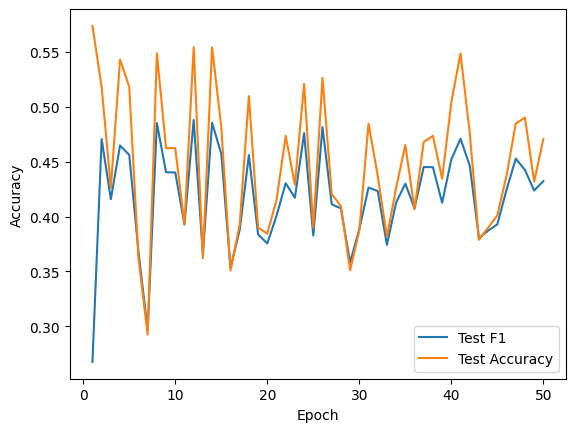

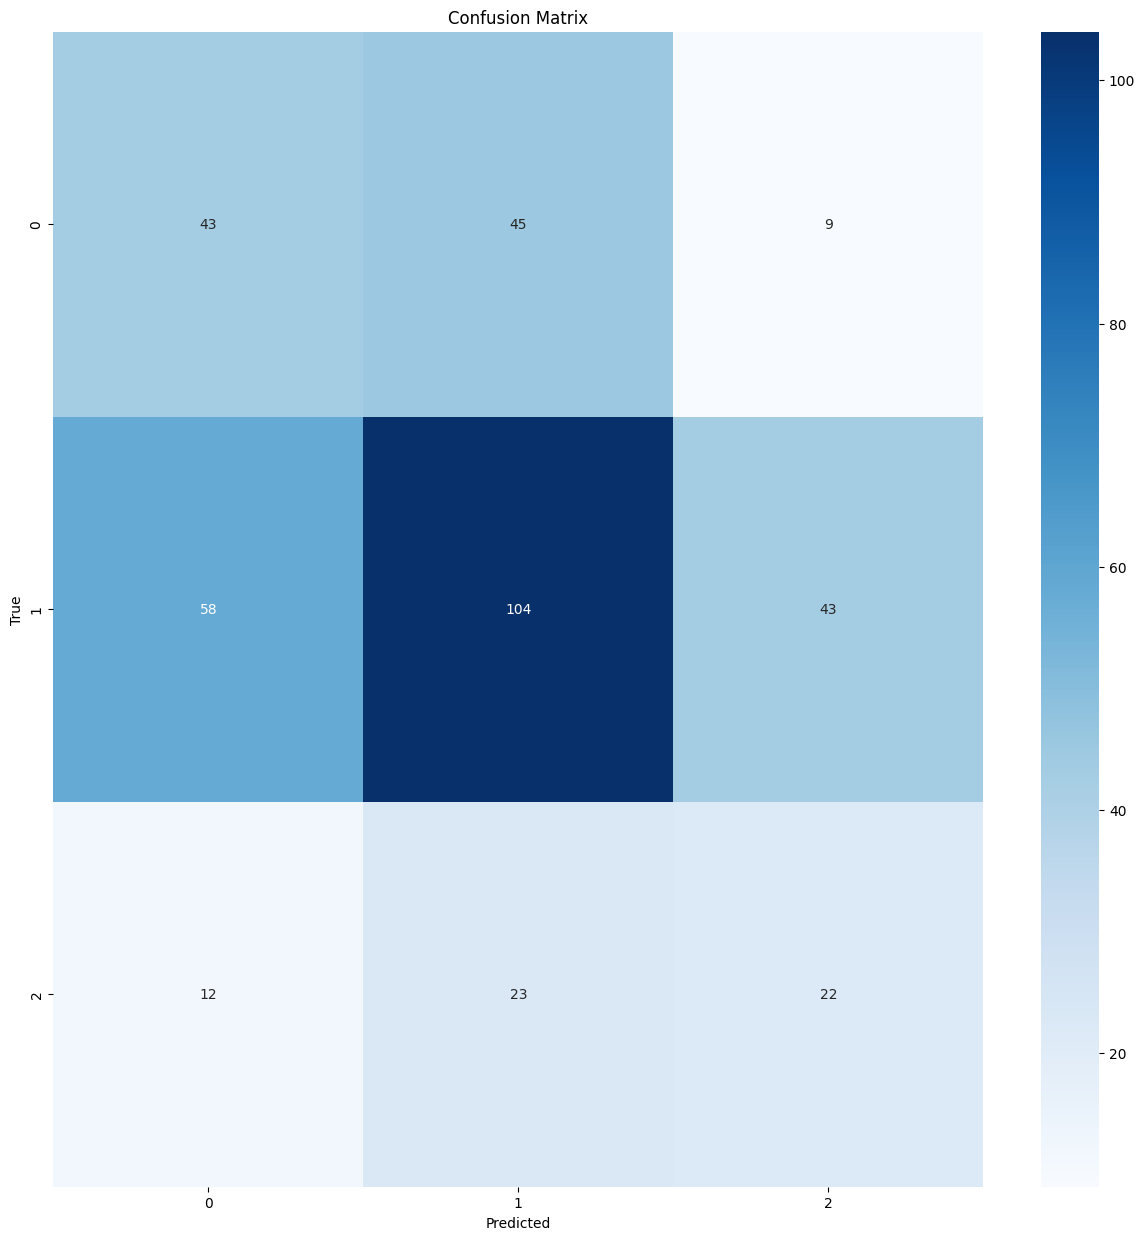

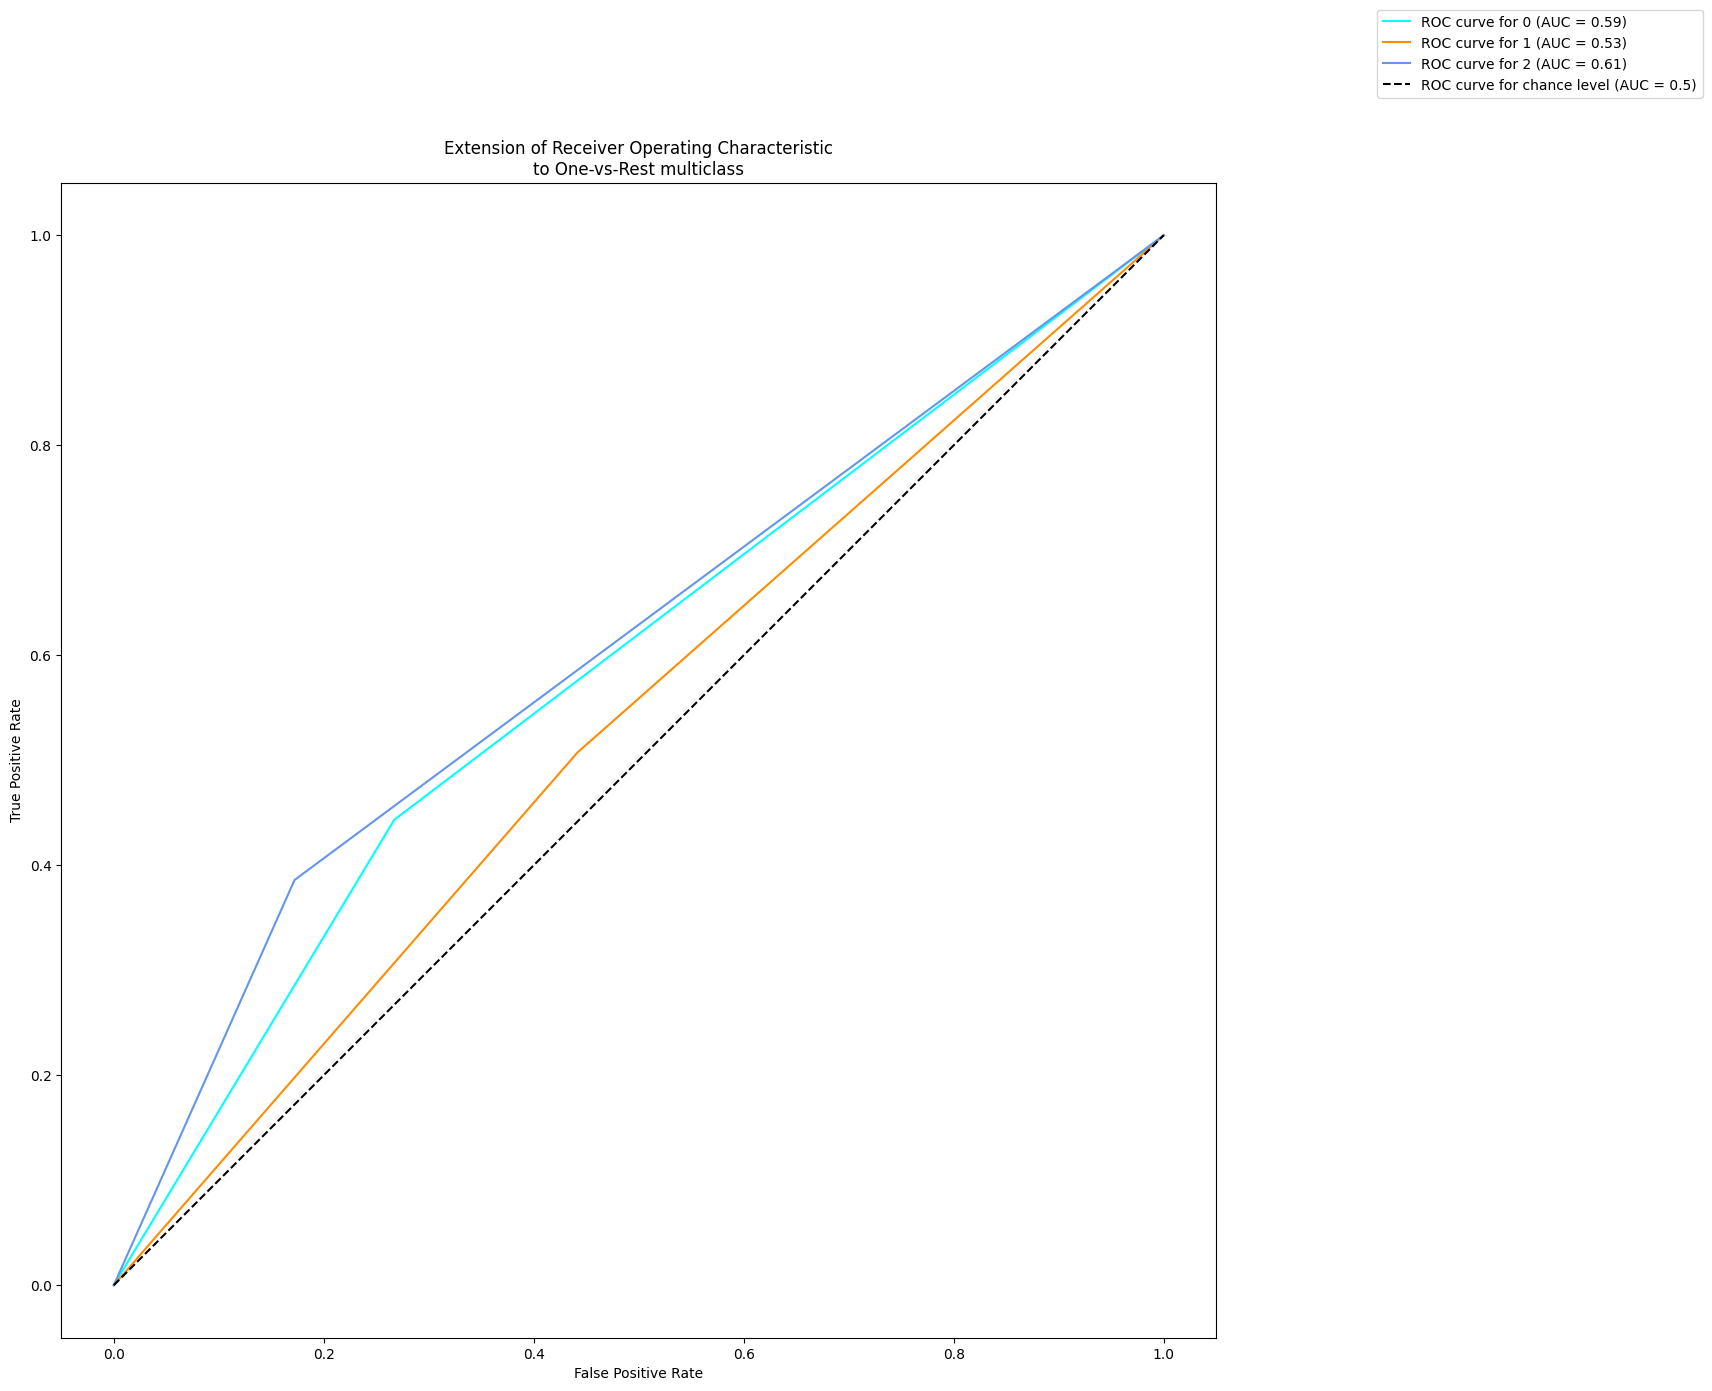

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        97
           1       0.60      0.51      0.55       205
           2       0.30      0.39      0.34        57

    accuracy                           0.47       359
   macro avg       0.43      0.45      0.43       359
weighted avg       0.50      0.47      0.48       359



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66307


STAGE:2024-02-25 14:38:30 300329:300329 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.4735, macro-f1: 0.4135
Epoch 1/50 - Training Time: 0.40 seconds | Inference Time: 0.20 seconds
Epoch 2/50 - Test Accuracy: 0.5543, macro-f1: 0.4883
Epoch 2/50 - Training Time: 0.42 seconds | Inference Time: 0.21 seconds
Epoch 3/50 - Test Accuracy: 0.4930, macro-f1: 0.4713
Epoch 3/50 - Training Time: 0.45 seconds | Inference Time: 0.23 seconds
Epoch 4/50 - Test Accuracy: 0.5125, macro-f1: 0.4732
Epoch 4/50 - Training Time: 0.43 seconds | Inference Time: 0.23 seconds
Epoch 5/50 - Test Accuracy: 0.4401, macro-f1: 0.4287
Epoch 5/50 - Training Time: 0.45 seconds | Inference Time: 0.23 seconds
Epoch 6/50 - Test Accuracy: 0.4485, macro-f1: 0.4320
Epoch 6/50 - Training Time: 0.48 seconds | Inference Time: 0.22 seconds
Epoch 7/50 - Test Accuracy: 0.4373, macro-f1: 0.4222
Epoch 7/50 - Training Time: 0.46 seconds | Inference Time: 0.22 seconds
Epoch 8/50 - Test Accuracy: 0.3705, macro-f1: 0.3695
Epoch 8/50 - Training Time: 0.44 seconds | Inference Time: 0.22 seconds


STAGE:2024-02-25 14:39:05 300329:300329 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-25 14:39:05 300329:300329 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        52.28%       11.739s        52.60%       11.812s       7.621ms     350.67 Mb     350.13 Mb          1550  
                                         training_batch         6.25%        1.404s        47.29%       10.619s       7.324ms    -349.94 Mb    -351.95 Mb          1450  
                              Optimizer.step#AdamW.step         4.75%        1.066s        15.20%        3.413s       2.968ms     518.06 Kb    -581.79

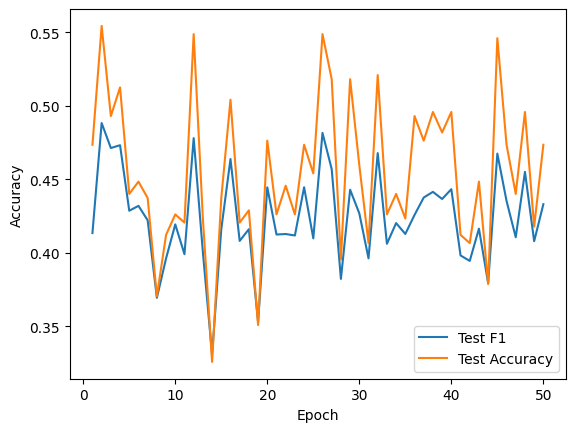

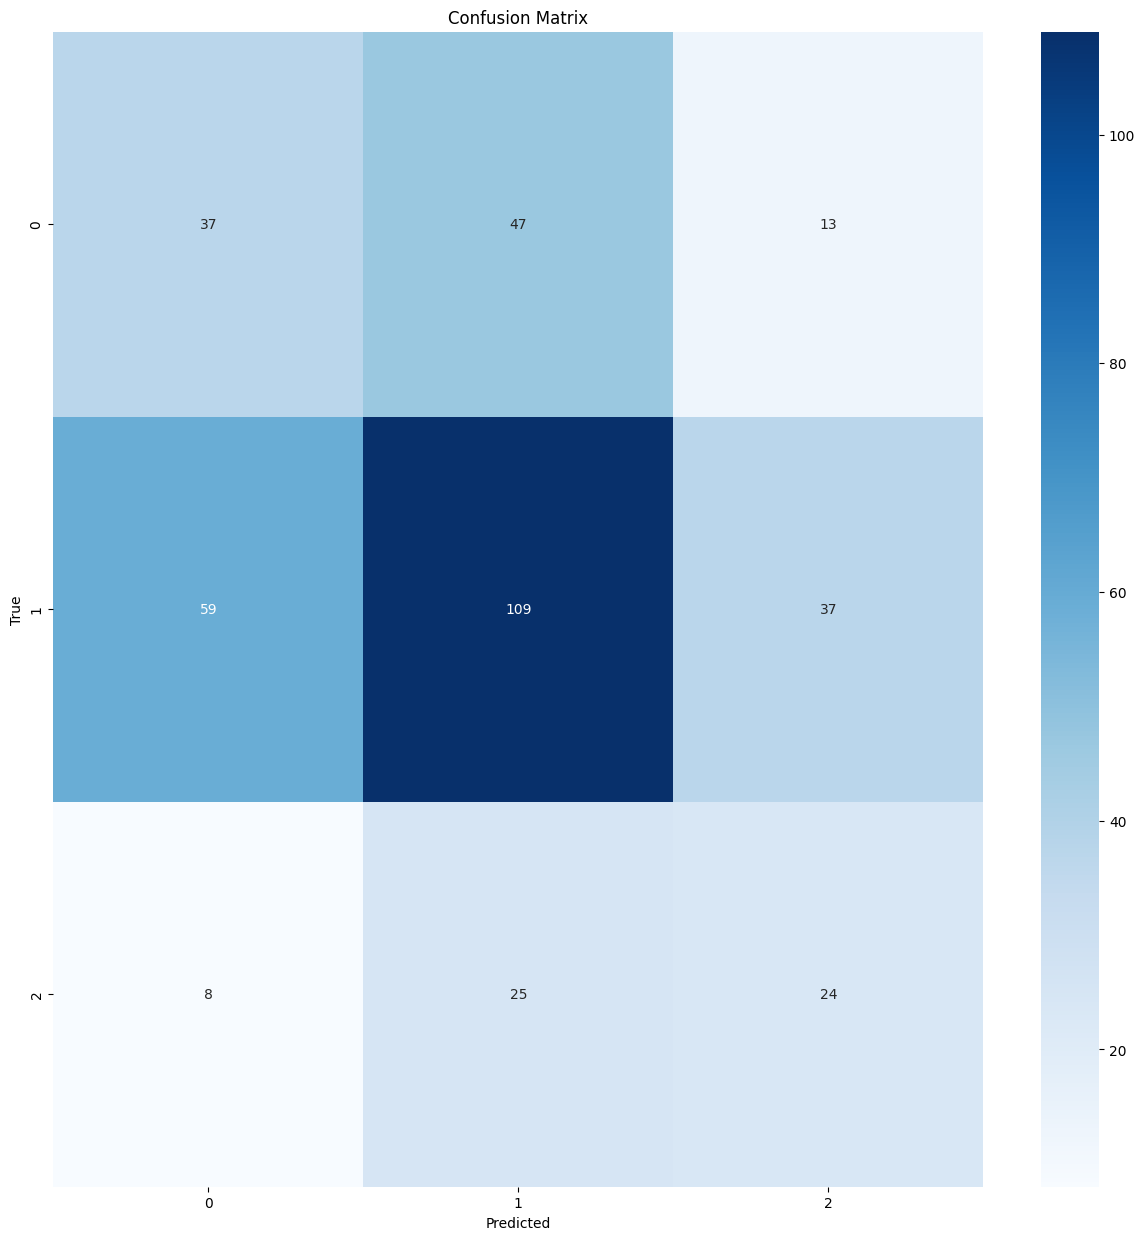

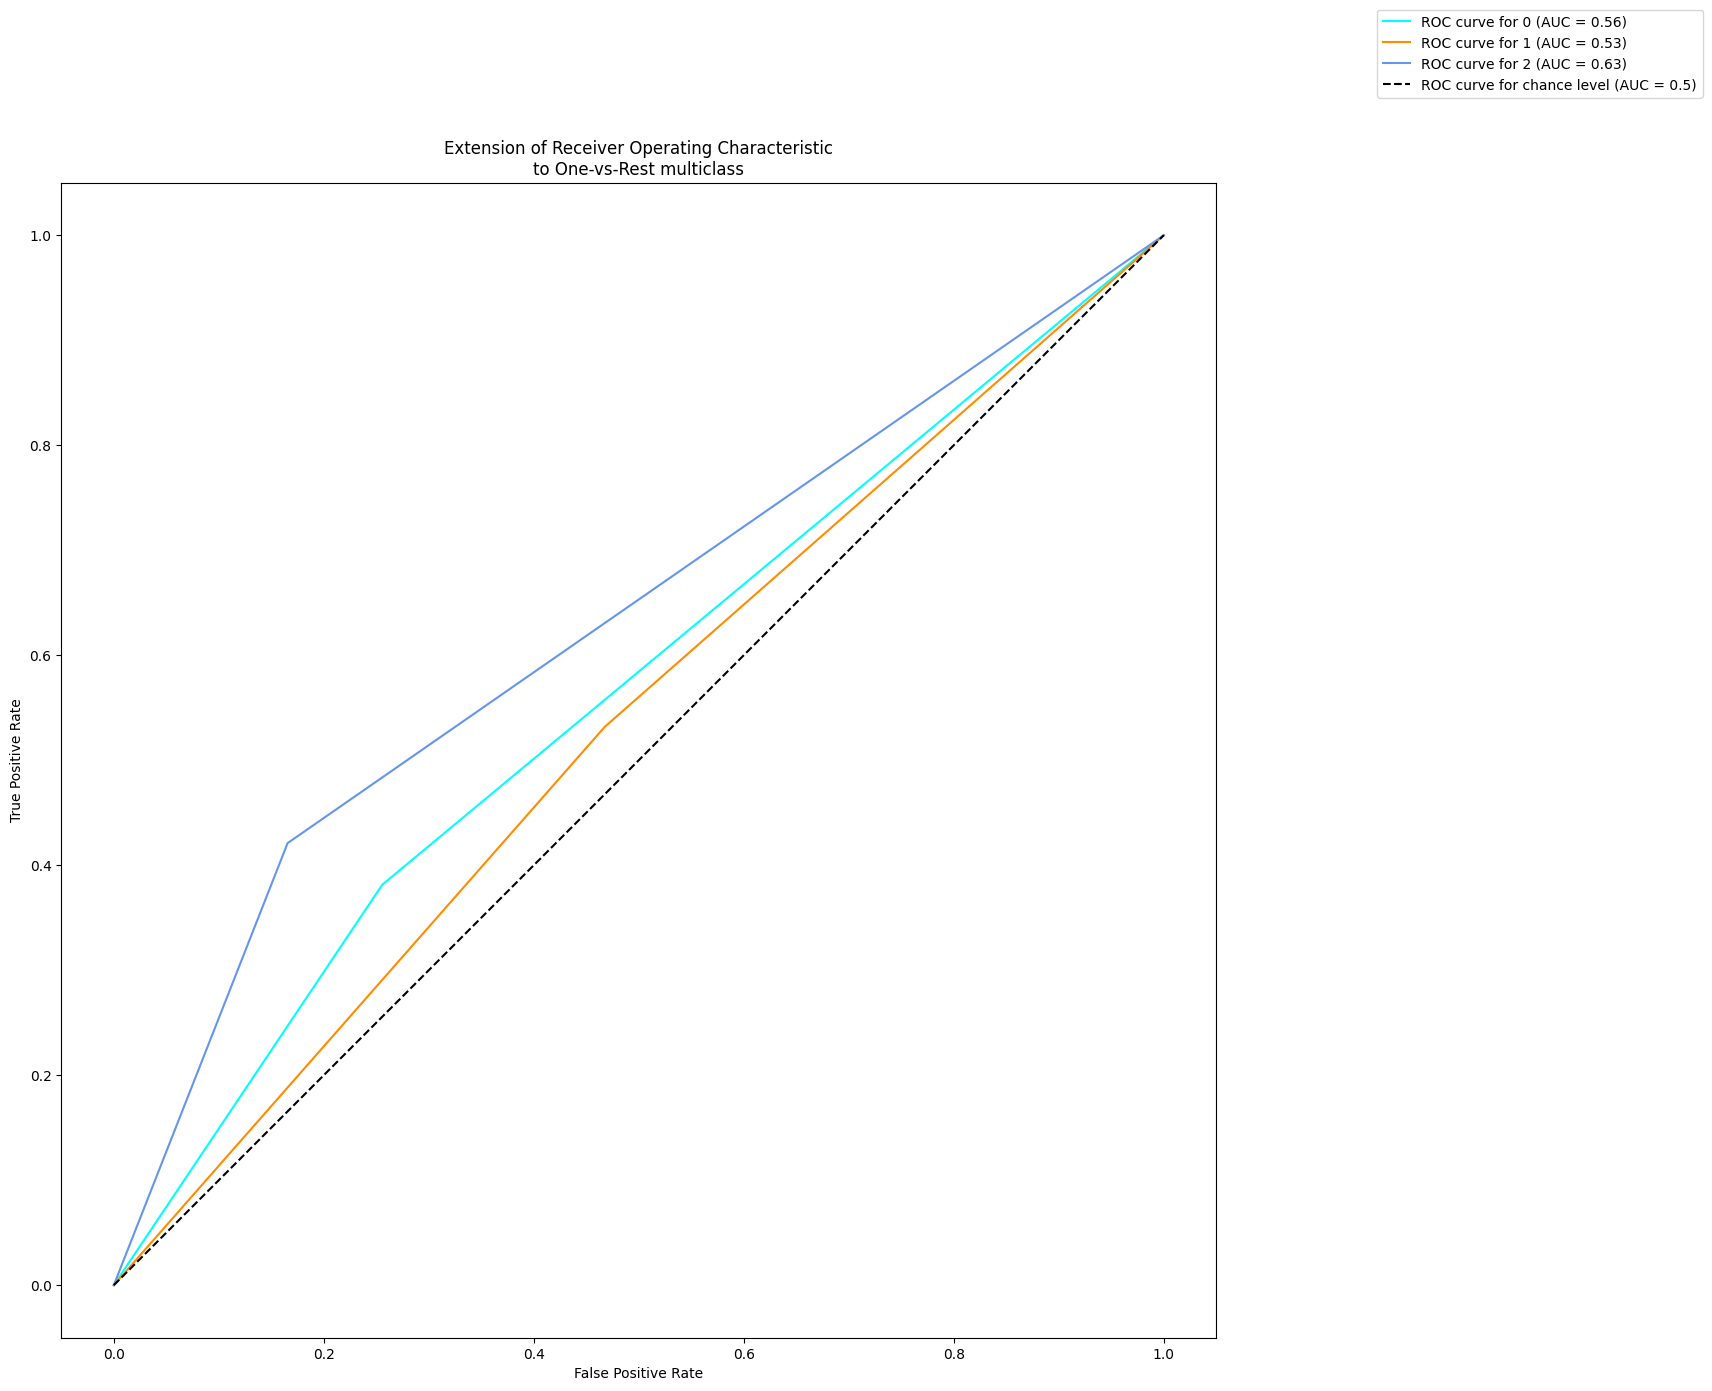

              precision    recall  f1-score   support

           0       0.36      0.38      0.37        97
           1       0.60      0.53      0.56       205
           2       0.32      0.42      0.37        57

    accuracy                           0.47       359
   macro avg       0.43      0.44      0.43       359
weighted avg       0.49      0.47      0.48       359



In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)